### Pandas

In [27]:
import pandas as pd
import numpy as np

### Manipulando Dados em Dataframes do Pandas

In [10]:
# Cria um dicionário
dados ={'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantis', 'Bahia', 'Minas Gerais'],
        'Ano': [2004, 2005, 2006, 2007, 2008],
        'Taxa de Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}

In [11]:
df = pd.DataFrame(dados)
df.head()

,Estado,Ano,Taxa de Desemprego
0,Santa Catarina,2004,1.5
1,Rio de Janeiro,2005,1.7
2,Tocantis,2006,1.6
3,Bahia,2007,2.4
4,Minas Gerais,2008,2.7


In [6]:
type(df)

pandas.core.frame.DataFrame

In [12]:
# Reorganizando as colunas
df = pd.DataFrame(dados, columns=['Estado', 'Taxa de Desemprego', 'Ano'])
df.head()

,Estado,Taxa de Desemprego,Ano
0,Santa Catarina,1.5,2004
1,Rio de Janeiro,1.7,2005
2,Tocantis,1.6,2006
3,Bahia,2.4,2007
4,Minas Gerais,2.7,2008


In [34]:
# Criando outro dataframe com os mesmos dados anteriores mas adicionando uma coluna
df2 = pd.DataFrame(dados,
                   columns= ['Estado', 'Taxa de Desemprego', 'Taxa de Crescimento', 'Ano'],
                   index = ['Estado1', 'Estado2', 'Estado3', 'Estado4', 'Estado5'])
df2.head()

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado1,Santa Catarina,1.5,NaN,2004
Estado2,Rio de Janeiro,1.7,NaN,2005
Estado3,Tocantis,1.6,NaN,2006
Estado4,Bahia,2.4,NaN,2007
Estado5,Minas Gerais,2.7,NaN,2008


In [35]:
# Consultando os valores
df2.values

array([['Santa Catarina', 1.5, nan, 2004],
       ['Rio de Janeiro', 1.7, nan, 2005],
       ['Tocantis', 1.6, nan, 2006],
       ['Bahia', 2.4, nan, 2007],
       ['Minas Gerais', 2.7, nan, 2008]], dtype=object)

In [16]:
type(df2.values) # Retorna um array NumPy

numpy.ndarray

In [17]:
# Consultando as colunas
df2.columns

Index(['Estado', 'Taxa de Desemprego', 'Taxa de Crescimento', 'Ano'], dtype='object')

In [18]:
# Tipo dos dados
df2.dtypes

Estado                  object
Taxa de Desemprego     float64
Taxa de Crescimento     object
Ano                      int64
dtype: object

In [19]:
# Imprimindo apenas uma coluna do DataFrame
df2['Estado']

Estado1    Santa Catarina
Estado2    Rio de Janeiro
Estado3          Tocantis
Estado4             Bahia
Estado5      Minas Gerais
Name: Estado, dtype: object

In [23]:
# Filtrando pelo índice
df2.filter(items = ['Estado4'], axis=0)

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado4,Bahia,2.4,NaN,2007


### Usando NumPy e Pandas para Manipulação de Dados

In [24]:
# Resumo estatístico dop Dataframe
df2.describe()

,Taxa de Desemprego,Ano
count,5.000000,5.000000
mean,1.980000,2006.000000
std,0.535724,1.581139
min,1.500000,2004.000000
25%,1.600000,2005.000000
50%,1.700000,2006.000000
75%,2.400000,2007.000000
max,2.700000,2008.000000


In [25]:
# Checa valores ausentes
df2.isna()

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado1,False,False,True,False
Estado2,False,False,True,False
Estado3,False,False,True,False
Estado4,False,False,True,False
Estado5,False,False,True,False


In [36]:
# Usando o NumPy para alimentar a coluna que tem os dados ausentes
df2['Taxa de Crescimento'] = np.arange(5.)
df2.head()

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado1,Santa Catarina,1.5,0.0,2004
Estado2,Rio de Janeiro,1.7,1.0,2005
Estado3,Tocantis,1.6,2.0,2006
Estado4,Bahia,2.4,3.0,2007
Estado5,Minas Gerais,2.7,4.0,2008


### Slicing de Dataframes do Pandas

In [37]:
df2['Estado2':'Estado4']

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado2,Rio de Janeiro,1.7,1.0,2005
Estado3,Tocantis,1.6,2.0,2006
Estado4,Bahia,2.4,3.0,2007


In [38]:
df2[df2['Taxa de Desemprego']<2]

,Estado,Taxa de Desemprego,Taxa de Crescimento,Ano
Estado1,Santa Catarina,1.5,0.0,2004
Estado2,Rio de Janeiro,1.7,1.0,2005
Estado3,Tocantis,1.6,2.0,2006


### Preenchendo Valores Ausentes em DataFrames do Pandas

A função fillna() é usada para preencher os valroes ausentes. A função oferece muitas opções. Podemos usar um valor específico, uma funçãoa agregada (por exemplo, média) ou o valor anterior seguinte.

Para esse exemplo usaremos a moda, a estatística que represente o valor que aparece mais vezes em uma variável.

In [39]:
# Primeiro importamos um dataset
df = pd.read_csv('dataset.csv')

In [40]:
df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AR-10002833,Office Supplies,Newell 322,7.2800,4.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
8,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.5040,3.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0


In [41]:
# Checando a quantidade de valores ausentes 
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [45]:
# Extraímos a moda da coluna Quantity
moda = df['Quantidade'].value_counts().index[0]

A moda em Estatística é uma medida de tendência central que representa o valor mais frequenete em um conjunto de dados.

A mode é especialmente útil quando queremos saber qual é o valor mais comum ou popular em um conjunto de dados, seja em uma distribuição unimodal (com apenas uma moda) ou em uma distribuiçao bimodal (com duas modas).

No entanto, a moda pode não ser tão representativa quanto outras medidas de tendência central, como a média e a mediana, especialmente em distribuições assimétricas ou quando há valores extremos. Por essa razçao, é importante analisar diferentes medidas de tendência central e usar a que melhor se adequa aos objetivos da análise estatística.

Como a própria definição afirma a moda é uma tendência central então se torna conveniente preencher os valores ausentes com o valor mais frequente dentro do conjunto de dados. Por isso a célula seguinte estará preenchendo os NaN com a moda encontrada.

In [46]:
# Preenchendo valores NaN com a moda
df['Quantidade'].fillna(value=moda, inplace=True)

### Query (Consulta) de Dados no DataFrame do Pandas

Com o Pandas criamos dataframes, que são essencialmente tabelas. Como tal, podemos fazer consultas, ou simplesmente queries. E para isso usamos o método query()

In [47]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [48]:
# Checamos os valores mínimo e máximo do coluna Valor_Venda
df['Valor_Venda'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

O intervalo de vendas é de 0.44 a 22638. Vamos fazer uma consulta e retornar todas as vendas dentro deum range de valores.

In [50]:
# Um novo dataframe dentro do intervalo de 229 - 10000
df2 = df.query('229 < Valor_Venda < 10000')

In [51]:
# Verificando maximo e minimo

In [52]:
df2['Valor_Venda'].describe()

count    2357.000000
mean      766.679142
std       856.315136
min       229.544000
25%       323.100000
50%       490.320000
75%       859.200000
max      9892.740000
Name: Valor_Venda, dtype: float64

In [53]:
# Um novo dataframe mas apenas com valores acima da média
df3 = df2.query('Valor_Venda > 766')
df3.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
11,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002033,Technology,Konftel 250 Conference phone - Charcoal black,911.4240,4.0
24,CA-2015-106320,2015-09-25,EB-13870,Consumer,United States,West,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3.0


### Verificando a Ocorrência de Diversos Valores em Uma Coluna

Em nosso conjunto de dados de exemplo temos a coluna Quantidade que representa a quantidade de itens vendido em cada uma das vendas. Imagine que precisamos saber em quais vendas foram vendidos 5, 7, 9 ou 11 itens.

Como aplicarámos esse tipo de filtro ao nosso dataframe?

O Pandas oferece o método isin() para checar diversos valores em uma coluna. Esse método é o equivalente a clásula IN em SQL.

In [54]:
df.shape

(9994, 11)

In [56]:
# Aplicando filtro
df[df['Quantidade'].isin([5,7,9,11])]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
...,...,...,...,...,...,...,...,...,...,...,...
9974,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-AR-10004752,Office Supplies,Blackstonian Pencils,18.6900,7.0
9977,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-FA-10003467,Office Supplies,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0
9981,CA-2017-163566,2017-08-03,TB-21055,Consumer,United States,East,OFF-LA-10004484,Office Supplies,Avery 476,16.5200,5.0
9982,US-2016-157728,2016-09-22,RC-19960,Consumer,United States,Central,OFF-PA-10002195,Office Supplies,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7.0


Na instrução acima estamos filtrando o dataframe chamando df, retornando todas as linhas onde a coluna Quantidade for igual aos valores,  5, 7, 9 ou 11. Passamos uma lista de valores como argumento para o método isin()

A instrução acima retornou 2.128 linha, se quisesermos retornar somente as 10 primeiras 10 linhas só bastava fatiar o resultado


In [57]:
df[df['Quantidade'].isin([5,7,9,11])][:10]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


### Operadores Lógicos Para Manipulação de Dados com Pandas

Os operadores lógicos são excelentes para filtrar dataframes e retornar exatamente os dados que precisamos para nosso trabalho.

In [58]:
# Filtrando as vendas que ocorreram para o segmento de Home Office e na região South
df[(df['Segmento'] == 'Home Office') & (df['Regiao'] == 'South')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
182,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10003273,Technology,AT&T TR1909W,503.9600,4.0
183,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-PH-10004896,Technology,Nokia Lumia 521 (T-Mobile),149.9500,5.0
184,CA-2014-158274,2014-11-19,RM-19675,Home Office,United States,South,TEC-AC-10002345,Technology,HP Standard 104 key PS/2 Keyboard,29.0000,2.0
231,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10001705,Furniture,Bush Advantage Collection Round Conference Table,233.8600,2.0
232,US-2017-100930,2017-04-07,CS-12400,Home Office,United States,South,FUR-TA-10003473,Furniture,Bretford Rectangular Conference Table Tops,620.6145,3.0


In [59]:
# Filtrando as vendas que ocorreram para o segmento de Home Office ou na região South
df[(df['Segmento'] == 'Home Office') | (df['Regiao'] == 'South')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
12,CA-2017-114412,2017-04-15,AA-10480,Consumer,United States,South,OFF-PA-10002365,Office Supplies,Xerox 1967,15.5520,3.0


In [ ]:
# Filtrando as vendas que não ocorream para o segemtno de Home Office e na região South
df[(df['Segmento'] != 'Home Office') & (df['Regiao'] != 'South')].head()

### Agrupamento de Dados em DataFrames com Groupby

A função Pandas Groupby é uma função versátil é fácil de usar que ajuda a obter uma visão geral dos dados. Isso torna mais fácil explorar o conjunto de dados e revelar os relacionamentos entre as variáveis.

O código a seguir agrupará as linhas com base nas combinações Segmento/Regiao/Valor_Venda e nos dará a taxa média de vendas de cada grupo.

In [60]:
# Aplicamos o groupby
df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).mean()

Valor_Venda
Segmento    Regiao              
Consumer    Central   207.946728
            East      238.875539
            South     233.390180
            West      217.033955
Corporate   Central   234.763466
            East      228.516929
            South     238.992025
            West      235.265911
Home Office Central   208.248046
            East      253.911805
            South     272.996329
            West      239.442692

Na instrução acima, primeiro filtramos os dados extraindo 3 colunas ```['Segmento', 'Regiao', 'Valor_Venda']```. Na sequência, agrupamos por duas colunas: ```['Segmento', 'Regiao']```. E então calculamos a média para a coluna que ficou fora do groupby, nesse caso a coluna Valor_Venda.

O comportamento do groupby com pandas é o mesmo da linguagem SQL

### Agregação Múltipla com Group By

Vamos explorar mais a função groupby() pois temos diversas opções de sumarização dos dados de forma simples. No exemplo abaixo uniremos a função groupby() com a função agg() para realizar agregação múltipla

In [61]:
# Aplicamos o group by
df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).agg(['mean', 'std', 'count'])

Valor_Venda                   
                           mean          std count
Segmento    Regiao                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

Na instrução acima, primeiro filtramos os dados extraindo 3 colunas ```['Segmento', 'Regiao', 'Valor_Venda']```. Na sequência, agrupamos por duas colunas: ```['Segmento', 'Regiao']```. E então agregamos os dados calculando a média, desvio padrão e a contagem de elementos para coluna que ficou fora do agrupamento.

### Filtrando DataFrame do Pandas com Base em Strings

O Pandas oferece diversas funções para manipulações de strings. Começaremos com o filtros de strings com base nas letras iniciais e finais

In [63]:
# Filtramos o dataframe pela coluna Segmento com valores que iniciam com as letras 'Con'
df[df['Segmento'].str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [64]:
# Filtramos o dataframe pela coluna Segmento com valores que terminam com as letras 'mer'
df[df['Segmento'].str.endswith('mer')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


### Split de Strings em DataFrames do Pandas

Com Pandas podemos realizar diversas tarefas de split de strings dividindo uma coluna ou extraindo elementos do nosso interesse.

In [65]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [66]:
df['ID_Pedido'].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: ID_Pedido, dtype: object

Este é o formato dos dados da coluna 'ID_Pedido':
- CA-2016-152156
- US-2015-108966
Temos o país, ano e o id do pedido. Vamos dividir essa coluna e extrair o ano para gravar em uma nova coluna

In [67]:
# Split da coluna pelo caractere '-'
df['ID_Pedido'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: ID_Pedido, Length: 9994, dtype: object

In [68]:
df['ID_Pedido'].str.split('-').str[1].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: ID_Pedido, dtype: object

In [70]:
# Fazemos o split da coluna e extraímos o item do indice 1
df['Ano'] = df['ID_Pedido'].str.split('-').str[1]
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


### Strip X Split

🟢 1. split() → Divide a string em partes
- O .split() separa uma string em várias partes com base em um delimitador e retorna uma lista.

🟢 2. strip() → Remove espaços em branco e caracteres indesejados
- O .strip() remove espaços extras (ou caracteres específicos) apenas do início e do fim da string.

### Strip de Strings em DataFrames do Pandas

In [71]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [72]:
df['Data_Pedido'].head()

0    2016-11-08
1    2016-11-08
2    2016-06-12
3    2015-10-11
4    2015-10-11
Name: Data_Pedido, dtype: object

A coluna 'Data_Pedido' é a data de envio do produto no formato YYYY-MM-DD. Imagine que seja necessário deixar o ano apenas com 2 dígitos sem alterar o tipo da variável. Fazemos isso com a função lstrip(), ou seja left strip

In [75]:
# Vmaos remover os dígitos 2 e 0 à esquerda do valor da variável
df['Data_Pedido'].str.lstrip('20')

0       16-11-08
1       16-11-08
2       16-06-12
3       15-10-11
4       15-10-11
          ...   
9989    14-01-21
9990    17-02-26
9991    17-02-26
9992    17-02-26
9993    17-05-04
Name: Data_Pedido, Length: 9994, dtype: object

### Replace de Strings em DataFrames do Pandas

Se for necessário substituir caracteres dentro de uma string o Pandas oferece uma função para isso.

In [76]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [77]:
# Substituímos os caracteres CG por AX na coluna 'ID_Cliente'
df['ID_Cliente'] = df['ID_Cliente'].str.replace('CG', 'AX')

In [78]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


### Combinação de Strings em DataFrames do Pandas

A função cat() pode ser usada para concatenar strings em um dataframe do Pandas


In [79]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [80]:
# Concatenando Strings
df['Pedido_Segmento'] = df['ID_Pedido'].str.cat(df['Segmento'], sep='-')

In [81]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano,Pedido_Segmento
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016,CA-2016-152156-Consumer
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016,CA-2016-152156-Consumer
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016,CA-2016-138688-Corporate
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015,US-2015-108966-Consumer
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015,US-2015-108966-Consumer


### Construção de Gráficos a partir de DataFrames do Pandas

Vimos até aqui diversas funcionalidades do Pandas que tornam o processo de mainpulação de dados realmente simples. E para concluir este capítulo vamos estudar as opções que o Pandas oferece para criação de gráficos direamente a partir de dataframes, sem a necessidade de usar qualquer outra biblioteca

In [86]:
# Dataset Iris
from sklearn.datasets import load_iris
data = load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [87]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['Species'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

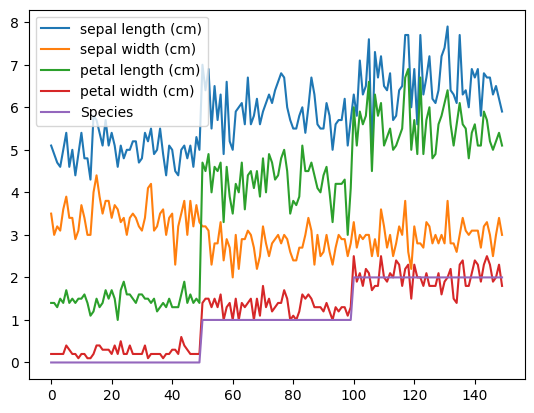

In [88]:
# Para criar um gráfico de linhas com todas as variáveis do dataframe, basta fazer isso:
df.plot()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

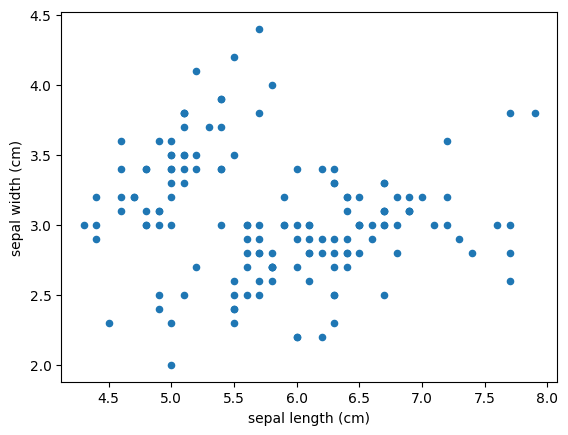

In [91]:
# Plot com duas variáveis
df.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

<Axes: >

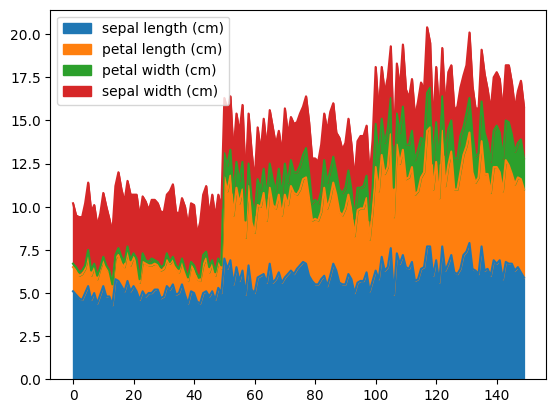

In [92]:
# Gráficos mais complexos, como um gráfico de área
columns = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']
df[columns].plot.area()

<Axes: xlabel='Species'>

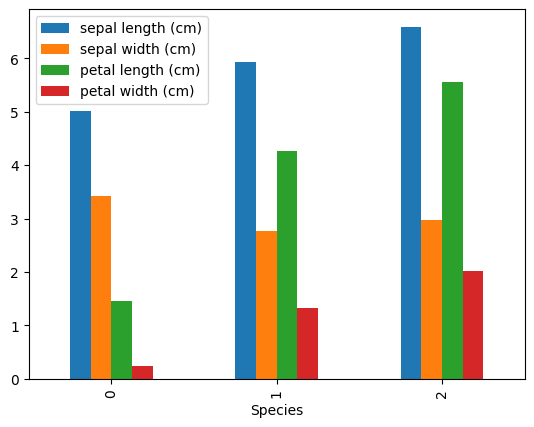

In [94]:
# Média das colunas agrupando pela coluna species e criamos um gráfico de barras com o resultado
df.groupby('Species').mean().plot.bar()

<Axes: ylabel='sepal length (cm)'>

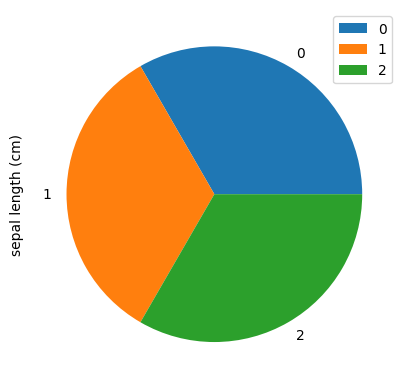

In [95]:
# Contagem de classes da coluna species e plotamos em um gráfico de pizza
df.groupby('Species').count().plot.pie(y ='sepal length (cm)')